<img src="../Fink_PrimaryLogo_WEB.jpg" width=300 />

# Fink case study: multi-messenger/wavelength astronomy

## Goal

The goal of this notebook is to show how Fink can contribute to multi-messenger and multi-wavelength science. This notebook includes queries for science related to **Orphan Afterglows**. 

Real-time analysis for follow-up coordination will be better done through the Fink livestreams which processes and makes available the alert data within minutes of reception. Access through this notebook uses the API access which is not real-time based. We aggregate the data into our API and Science Portal database at the end of each observing night. API access can be useful to analyze last night and older alerts. For example in case of reprocessing analysis in the search for low signal-to-noise events in GW or other wavelength detectors.

## What is behind?

This notebook will use:
- **Fink cross-match** with close by sources in the [SIMBAD (Wenger et al. 2020)](https://aas.aanda.org/articles/aas/abs/2000/07/ds1821/ds1821.html) catalogue (within 1'') using [xmatch service](http://cdsxmatch.u-strasbg.fr) provided by the Centre de Données astronomiques de Strasbourg (CDS) .
- **Fink's machine learning classification** scores trained with [(Muthukrishna et al. 2019)](https://arxiv.org/abs/1904.00014) and [(Stachie et al. 2019)](https://arxiv.org/abs/1912.06383):
    - Random Forest to classify Kilonovae (Biswas et al. in prep)
    - [SuperNNova](https://github.com/supernnova/SuperNNova) [(Möller & de Boissière 2019)](https://academic.oup.com/mnras/article-abstract/491/3/4277/5651173) to classify SNe at all light-curve epochs
    - Random Forest (Leoni et al. in prep) and [(Ishida et al. 2019b)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483....2I/abstract) to classify early (pre-max) SN candidates
- **Fink's extra features** such as color `r-g` when possible.

## Environment set up

To run this notebook, you need to import the following libraries (already installed in colab):

In [1]:
import requests
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# looking into unknown objects

### <font color='blue'>API query:</font> <font color='orange'> latest alerts</font> of unknown objects

In [2]:
# Get latests 1000 alerts associated to Kilonova eventa
def query_fink(n):
    r = requests.post(
      'http://134.158.75.151:24000/api/v1/latests',
      json={
        'class': 'Kilonova candidate',
        'n': '%d'%n,
      }
    )
    return r

n = 1000
tic = time.perf_counter()
r = query_fink(n)
toc = time.perf_counter()
print(f"Query {n:d} objects in {toc - tic:0.1f} seconds")

# Format output in a DataFrame
pdf = pd.read_json(r.content)
print(pdf.keys())

Query 1000 objects in 2.4 seconds
Index(['d:cdsxmatch', 'd:knscore', 'd:mulens_class_1', 'd:mulens_class_2',
       'd:rfscore', 'd:roid', 'd:snn_sn_vs_all', 'd:snn_snia_vs_nonia',
       'i:candid', 'i:chipsf', 'i:classtar', 'i:dec', 'i:diffmaglim',
       'i:distnr', 'i:distpsnr1', 'i:drb', 'i:fid', 'i:field', 'i:isdiffpos',
       'i:jd', 'i:jdendhist', 'i:jdstarthist', 'i:maggaia', 'i:magnr',
       'i:magpsf', 'i:magzpsci', 'i:ndethist', 'i:neargaia', 'i:nid',
       'i:nmtchps', 'i:objectId', 'i:publisher', 'i:ra', 'i:rb', 'i:rcid',
       'i:sgscore1', 'i:sigmagnr', 'i:sigmapsf', 'i:ssdistnr', 'i:ssmagnr',
       'i:ssnamenr', 'i:tooflag', 'i:xpos', 'i:ypos', 'v:classification',
       'v:g-r', 'v:rate(g-r)', 'v:dg', 'v:rate(dg)', 'v:dr', 'v:rate(dr)',
       'v:lastdate'],
      dtype='object')


API arguments: http://134.158.75.151:24000/api/v1/latests

Output table schema: http://134.158.75.151:24000/api/v1/columns.

In [3]:
oa_0 = pdf[pdf['i:ndethist']<12 ]
oa_1 = oa_0[oa_0['i:ndethist']>2]
oa_1

,d:cdsxmatch,d:knscore,d:mulens_class_1,d:mulens_class_2,d:rfscore,d:roid,d:snn_sn_vs_all,d:snn_snia_vs_nonia,i:candid,i:chipsf,...,i:xpos,i:ypos,v:classification,v:g-r,v:rate(g-r),v:dg,v:rate(dg),v:dr,v:rate(dr),v:lastdate
0,Unknown,0.566667,,,0.046,0,0.042704,0.776410,1641386366315015043,59.171425,...,1038.5494,2552.1067,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-06-30 09:16:21.996
1,Unknown,0.600000,,,0.046,0,0.052354,0.824677,1640352905515015008,5.687708,...,1730.9149,2608.9885,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-06-29 08:28:11.001
2,Unknown,0.866667,,,0.046,0,0.002203,0.723019,1640318845515015003,9.294909,...,1741.0233,2616.9640,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-06-29 07:39:08.001
3,Unknown,0.800000,,,0.046,0,0.123387,0.775725,1639415156315015025,111.955120,...,1010.6115,2537.7060,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-06-28 09:57:49.003
4,Unknown,0.600000,,,0.000,0,0.159706,0.641850,1630381824515010027,4.474494,...,2889.5159,169.6705,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-06-19 09:09:50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Unknown,0.740000,,,0.046,0,0.036744,0.764796,1555187461115015004,61.152374,...,1768.2220,983.2989,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-04-05 04:29:57.002
69,Unknown,0.700000,,,0.046,0,0.577882,0.668809,1553377920715015002,1.465893,...,2911.3691,351.2066,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-04-03 09:04:12.996
72,Unknown,0.520000,,,0.046,0,0.621601,0.701202,1553222761115015008,23.290575,...,1751.8320,987.2286,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-04-03 05:20:47.000
73,Unknown,0.520000,,,0.046,0,0.587073,0.698982,1549425335015015000,2.039243,...,2148.7202,236.2409,Kilonova candidate,NaN,NaN,0.0,0.0,0.0,0.0,2021-03-30 10:12:28.996


### <font color='blue'>Analysing the output:</font>   <font color='orange'>nb of detections</font>  of these alerts

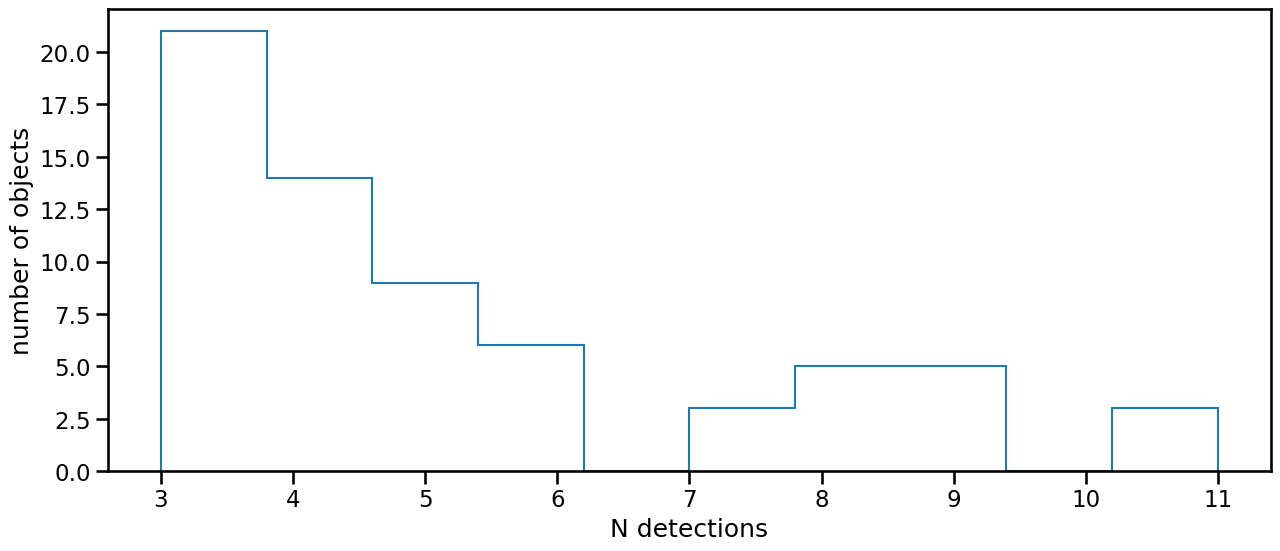

In [4]:
fig = plt.figure(figsize=(15, 6))

plt.hist(oa_1['i:ndethist'],histtype='step')
plt.ylabel('number of objects')
plt.xlabel('N detections')
plt.show()

In [5]:
# print table
oa_2 = oa_1[['i:magpsf', 'i:ndethist', 'i:objectId', 'i:classtar', 'v:lastdate', 'v:classification', 'v:g-r']]
oa_2.sort_values(by="i:ndethist")

,i:magpsf,i:ndethist,i:objectId,i:classtar,v:lastdate,v:classification,v:g-r
52,19.643717,3,ZTF21aavotzn,0.918,2021-04-15 05:13:39.000,Kilonova candidate,NaN
41,18.606337,3,ZTF21aazhegf,0.999,2021-05-08 05:08:28.003,Kilonova candidate,NaN
40,18.284878,3,ZTF21aazieut,0.983,2021-05-08 06:39:30.997,Kilonova candidate,NaN
64,17.457893,3,ZTF21aarwbtx,0.792,2021-04-07 05:30:50.003,Kilonova candidate,NaN
25,19.896366,3,ZTF21abeeewf,0.978,2021-06-05 06:04:51.004,Kilonova candidate,NaN
...,...,...,...,...,...,...,...
48,17.053278,9,ZTF21aavqphe,0.984,2021-04-20 06:34:12.000,Kilonova candidate,NaN
15,17.550125,9,ZTF21abezgfb,0.984,2021-06-14 07:32:40.004,Kilonova candidate,NaN
43,19.603024,11,ZTF21aayquba,0.975,2021-05-05 09:30:30.997,Kilonova candidate,NaN
73,18.139406,11,ZTF21aaqwjlz,0.983,2021-03-30 10:12:28.996,Kilonova candidate,NaN


In [6]:
oa_2['i:objectId']

0     ZTF21abiblog
1     ZTF21abhytgb
2     ZTF21abhytgb
3     ZTF21abiblog
4     ZTF21abhgrar
          ...     
68    ZTF21aarqkes
69    ZTF21aaridvf
72    ZTF21aarqkes
73    ZTF21aaqwjlz
74    ZTF21aaqpykm
Name: i:objectId, Length: 66, dtype: object

### <font color='blue'>API query:</font> <font color='orange'> photometry </font> of one object

In [7]:
single_object = 'ZTF21abaakwd'

In [8]:
# get all alert information related to this object
r = requests.post(
   'http://134.158.75.151:24000/api/v1/objects',
   json={
     'objectId': single_object,
     'withupperlim': 'True'
   }
 )

# Format output in a DataFrame
single_object = pd.read_json(r.content)

This query can include upper limits and bad quality data associated to this object using the argument `withupperlim`.
See http://134.158.75.151:24000/api/v1/objects to get the list of available arguments.


### <font color='blue'>Analysing the output:</font>  plot one light-curve for visualization

See the example on http://134.158.75.151:24000/api to plot full lightcurve with layout template. We implement here an useful function for plotting light-curves in this notebook.

In [9]:
def plot_lc(pdf):
    """ Plot photometry contains in an alert
    
    Parameters
    ----------
    pdf: pandas DataFrame
        Pandas DataFrame with single alert row
    """
    fig = plt.figure(figsize=(15, 6))

    # Colors to plot
    colordic = {1: 'C0', 2: 'C1'}

    # Labels of ZTF filters
    filtdic = {1: 'g', 2: 'r'}

    for filt in np.unique(pdf['i:fid']):
        # select data from one filter at a time
        maskFilt = pdf['i:fid'] == filt

        # The column `d:tag` is used to check data type
        maskValid = pdf['d:tag'] == 'valid'
        plt.errorbar(
            pdf[maskValid & maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf[maskValid & maskFilt]['i:magpsf'],
            pdf[maskValid & maskFilt]['i:sigmapsf'],
            ls = '', marker='o', color=colordic[filt], label=filtdic[filt]
        )

        maskUpper = pdf['d:tag'] == 'upperlim'
        plt.plot(
            pdf[maskUpper & maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf[maskUpper & maskFilt]['i:diffmaglim'],
            ls='', marker='^', color=colordic[filt], markerfacecolor='none'
        )

        maskBadquality = pdf['d:tag'] == 'badquality'
        plt.errorbar(
            pdf[maskBadquality & maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf[maskBadquality & maskFilt]['i:magpsf'],
            pdf[maskBadquality & maskFilt]['i:sigmapsf'],
            ls='', marker='v', color=colordic[filt]
        )

    plt.gca().invert_yaxis()
    plt.legend()
    plt.title(pdf['i:objectId'][0])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Magnitude')
    plt.show()

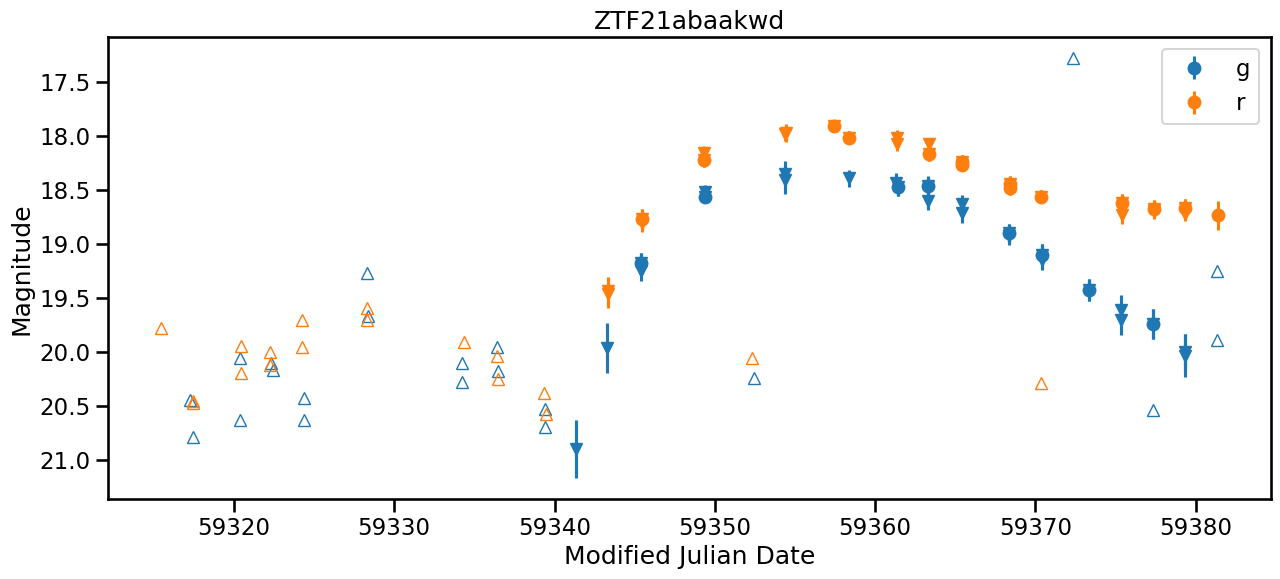

In [10]:
plot_lc(single_object)

In this plot:
- Circles (●) with error bars show valid alerts that pass the Fink quality cuts.
- Upper triangles with errors (▲), represent alert measurements that do not satisfy Fink quality cuts, but are nevetheless contained in the history of valid alerts and used by classifiers.
- Lower triangles (▽), represent 5-sigma mag limit in difference image based on PSF-fit photometry contained in the history of valid alerts.

In [11]:
# get data for one object
def get_data(single_object):
    r = requests.post(
        'http://134.158.75.151:24000/api/v1/objects',
        json={
              'objectId': single_object,
              'withupperlim': 'True'
        }
    )
    object_data = pd.read_json(r.content)
    return object_data

# Loop on interesting candidates
frames = list()
for single_object in oa_2['i:objectId']:
    object_data = get_data(single_object)
    frames.append(object_data)

result = pd.concat(frames)
result

In [14]:
# save to parquet file on dis
result.to_parquet('orphans_df.zstd', compression='zstd')

In [15]:
# read back
orphans = pd.read_parquet('orphans_df.zstd')
orphans

,b:cutoutDifference_stampData,b:cutoutScience_stampData,b:cutoutTemplate_stampData,d:cdsxmatch,d:knscore,d:mulens_class_1,d:mulens_class_2,d:nalerthist,d:rfscore,d:roid,...,i:zpmed,v:classification,v:g-r,v:rate(g-r),v:dg,v:rate(dg),v:dr,v:rate(dr),v:lastdate,d:tag
0,binary:ZTF21abiblog_2459395.8863657:cutoutDiff...,binary:ZTF21abiblog_2459395.8863657:cutoutScie...,binary:ZTF21abiblog_2459395.8863657:cutoutTemp...,Unknown,0.566667,,,5.0,0.046,0.0,...,25.848,Kilonova candidate,NaN,NaN,0.418771,0.202348,0.000000,0.000000,2021-06-30 09:16:21.996,valid
1,binary:ZTF21abiblog_2459393.9151505:cutoutDiff...,binary:ZTF21abiblog_2459393.9151505:cutoutScie...,binary:ZTF21abiblog_2459393.9151505:cutoutTemp...,Unknown,0.800000,,,4.0,0.046,0.0,...,26.483,Kilonova candidate,-0.12906,-0.06453,0.000000,0.000000,0.769454,0.366548,2021-06-28 09:57:49.003,valid
2,None,None,None,None,NaN,None,None,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,badquality
3,None,None,None,None,NaN,None,None,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,badquality
4,binary:ZTF21abiblog_2459393.8168056:cutoutDiff...,binary:ZTF21abiblog_2459393.8168056:cutoutScie...,binary:ZTF21abiblog_2459393.8168056:cutoutTemp...,Unknown,0.000000,,,3.0,0.000,0.0,...,26.272,SN candidate,NaN,NaN,0.640394,0.338027,0.000000,0.000000,2021-06-28 07:36:12.004,valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,None,None,None,None,NaN,None,None,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,upperlim
58,None,None,None,None,NaN,None,None,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,upperlim
59,None,None,None,None,NaN,None,None,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,upperlim
60,None,None,None,None,NaN,None,None,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,upperlim


In [19]:
one = orphans[orphans['i:objectId']=='ZTF21aaqpykm']
one[['i:magpsf', 'i:ndethist', 'i:objectId', 'i:classtar', 'v:lastdate', 'v:classification', 'v:g-r']]

,i:magpsf,i:ndethist,i:objectId,i:classtar,v:lastdate,v:classification,v:g-r
0,19.269693,92.0,ZTF21aaqpykm,0.982,2021-05-07 06:45:35.001,Ambiguous,NaN
1,20.251300,NaN,ZTF21aaqpykm,NaN,None,None,NaN
2,19.228100,NaN,ZTF21aaqpykm,NaN,None,None,NaN
3,19.100807,76.0,ZTF21aaqpykm,0.977,2021-05-02 08:05:12.998,Ambiguous,NaN
4,19.100800,NaN,ZTF21aaqpykm,NaN,None,None,NaN
...,...,...,...,...,...,...,...
57,NaN,NaN,ZTF21aaqpykm,NaN,None,None,NaN
58,NaN,NaN,ZTF21aaqpykm,NaN,None,None,NaN
59,NaN,NaN,ZTF21aaqpykm,NaN,None,None,NaN
60,NaN,NaN,ZTF21aaqpykm,NaN,None,None,NaN
